## **A Data-Driven Market Intelligence System for Stock Risk and Behavior Analysis at the Nairobi Securities Exchange**

## Problem Statement

Despite the Nairobi Securities Exchange (NSE) seeing a surge in equity turnover-rising 18% to Ksh 56 billion in 2025 ([SE Half-Year Results, 2025](https://www.nse.co.ke/wp-content/uploads/NSE-Plc-Unaudited-Group-results-for-the-6-months-ended-30-June-2025.pdf)), retail participation remains hampered by a critical information gap. Research from the Institute of Certified Investment and Financial Analysts reveals that 77% of Kenyan retail investors rely on "personal research" and social intuition because they lack accessible analytical tools [ICIFA Annual Report, 2024](https://icifa.co.ke/static/resources/others/annual-report-2024465e3dbed42d.pdf)).

While the market added over Ksh 1 Trillion in capitalization since 2023, most investors suffer from "herding behavior," where decisions are made by following the crowd rather than technical data [USIU-Africa Research, 2025](https://erepo.usiu.ac.ke/xmlui/bitstream/handle/11732/8460/MASILA%20BRIAN%20SALU%20MBA%202024.pdf?sequence=1&isAllowed=y). This project bridges this gap by converting raw daily prices into behavioral risk clusters, moving investors from intuition to evidence-based decision-making.

## Objectives

**Main Objective**
- To develop a data-driven stock market intelligence system for the Nairobi Securities Exchange that analyzes historical stock price behavior and sector characteristics to support informed and risk-aware investment decisions.

**Specific Objectives**
1) Feature Engineering: To derive financial metrics including Rolling Volatility, Daily Returns, and Maximum Drawdowns to quantify stock behavior.

2) Behavioral Segmentation: To apply Unsupervised Machine Learning (K-Means/DBSCAN) to group stocks into risk-based clusters (e.g., Stable, High-Volatility, or Speculative).

3) Sector Risk Analysis: To identify systemic risks and stability patterns across different market sectors.

4) Interactive Deployment: To present these insights through a Streamlit Dashboard that allows users to select stocks, view their risk profile, and compare them against their sectors.

Data source:

[kenya NSE stocks](https://data.mendeley.com/datasets/ss5pfw8xnk/3)


**Date** – The calendar day of the trading information.

**Stock Code** – A unique identifier (ticker) for the stock.

**Stock Name** – The company’s name.

**12-month Low price** – The lowest price the stock traded at over the last 12 months.

**12-month High price** – The highest price over the last 12 months.

**Day’s Low price**– Lowest price the stock traded at on that day.

**Day’s High price** – Highest price on that day.

**Day’s Final Price** – Closing price that day.

**Previous traded price** – Closing price from the previous trading day.

**Change in price value** – Difference between today’s and previous day’s price.

**Change in price %** – Percentage change.

**Volume traded** – Number of shares traded that day.

**Adjusted price** – Price adjusted for corporate actions (like dividends, splits).

**Sector** -the sector the company belongs to



In [98]:
#import necessary libraries 

import pandas as pd
import numpy as np

In [99]:

#IMPORT DATA FOR YEARS 2021-2024
nse_2021=pd.read_csv("../Data/NSE_data_all_stocks_2021_upto_31dec2021.csv")
nse_2022=pd.read_csv("../Data/NSE_data_all_stocks_2022.csv")
nse_2023=pd.read_csv("../Data/NSE_data_all_stocks_2023.csv")
nse_2024=pd.read_csv("../Data/NSE_data_all_stocks_2024.csv")

#import sectors for each year
sectors_21=pd.read_csv("../Data/NSE_data_stock_market_sectors_as_at_31dec2021.csv")
sectors_22=pd.read_csv("../Data/NSE_data_stock_market_sectors_2022.csv")
sectors_2324=pd.read_csv("../Data/NSE_data_stock_market_sectors_2023_2024.csv")


In [100]:
#DISPLAY FIRST FEW ROWS

print("______________________________________________________")
print(f"2021 NSE DATA FIRST FEW ROWS:")
print("______________________________________________________")
display(nse_2021.head())
print("______________________________________________________")
print(f"2022 NSE DATA FIRST FEW ROWS: ")
print("______________________________________________________")
display(nse_2022.head())
print("______________________________________________________")
print(f"2023 NSE DATA FIRST FEW ROWS: ")
print("______________________________________________________")
display(nse_2023.head())
print("______________________________________________________")
print(f"2024 NSE DATA FIRST FEW ROWS:")
print("______________________________________________________")
display(nse_2024.head())
print("______________________________________________________")


______________________________________________________
2021 NSE DATA FIRST FEW ROWS:
______________________________________________________


,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,04-Jan-21,EGAD,Eaagads Ltd,8.2,14,12.5,12.5,12.5,12.5,-,-,"3,200",-
1,04-Jan-21,KUKZ,Kakuzi Plc,300,397,365,365,365,365,-,-,-,-
2,04-Jan-21,KAPC,Kapchorua Tea Kenya Plc,59,90,78,78,78,78,-,-,-,-
3,04-Jan-21,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-
4,04-Jan-21,SASN,Sasini Plc,14.8,20,19.5,19.5,19.5,19.5,-,-,-,-


______________________________________________________
2022 NSE DATA FIRST FEW ROWS: 
______________________________________________________


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.5,13.5,-,-,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355,427,385,385,385,385,-,-,-,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80,101,99.5,99.5,99.5,95.5,4,4.19%,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260,360,320,320,320,320,-,-,-,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.6,18.7,18.7,18.7,18.7,-,-,-,-


______________________________________________________
2023 NSE DATA FIRST FEW ROWS: 
______________________________________________________


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-23,EGAD,Eaagads Ltd,10.35,14.5,10.5,10.5,10.5,10.5,-,-,"1,900.00",-
1,3-Jan-23,KUKZ,Kakuzi Plc,342,440,385,385,385,385,-,-,-,-
2,3-Jan-23,KAPC,Kapchorua Tea Kenya Plc,207,280,115.75,115.75,115.75,113.25,2.5,2.21%,100,-
3,3-Jan-23,LIMT,Limuru Tea Plc,365,380,420,420,420,420,-,-,-,-
4,3-Jan-23,SASN,Sasini Plc,15.1,22,22,22.5,22.45,22.45,-,-,"6,900.00",-


______________________________________________________
2024 NSE DATA FIRST FEW ROWS:
______________________________________________________


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2-Jan-24,EGAD,Eaagads Ltd,10.35,14.5,12.8,12.8,12.8,13.95,-1.15,-8.24%,100,-
1,2-Jan-24,KUKZ,Kakuzi Plc,342,440,385,385,385,385,-,-,-,-
2,2-Jan-24,KAPC,Kapchorua Tea Kenya Plc,207,280,215,215,215,215,-,-,-,-
3,2-Jan-24,LIMT,Limuru Tea Plc,365,380,380,380,380,380,-,-,-,-
4,2-Jan-24,SASN,Sasini Plc,15.1,22,20,20,20,20,-,-,"3,300.00",-


______________________________________________________


In [101]:
#DISPLAY FIRST FEW ROWS FOR SECTOR

print("______________________________________________________")
print(f"2021 SECTOR DATA FIRST FEW ROWS:")
print("______________________________________________________")
display(sectors_21.head())
print("______________________________________________________")
print(f"2022 SECTOR DATA FIRST FEW ROWS: ")
print("______________________________________________________")
display(sectors_22.head())
print("______________________________________________________")
print(f"2023 & 2024 NSE DATA FIRST FEW ROWS:")
print("______________________________________________________")
display(sectors_2324.head())
print("______________________________________________________")



______________________________________________________
2021 SECTOR DATA FIRST FEW ROWS:
______________________________________________________


,SECTOR,CODE,NAME
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc


______________________________________________________
2022 SECTOR DATA FIRST FEW ROWS: 
______________________________________________________


,Sector,Stock_code,Stock_name
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc


______________________________________________________
2023 & 2024 NSE DATA FIRST FEW ROWS:
______________________________________________________


,Sector,Stock_code,Stock_name
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc


______________________________________________________


In [102]:
#CHECK COLUMNS FOR EACH DATA
print("______________________________________________________")
print("The column for the stocks 2021-2024:")
print("______________________________________________________")
print(nse_2021.columns)
print(nse_2022.columns)
print(nse_2023.columns)
print(nse_2024.columns)
print("______________________________________________________")
print("The column for the sectors 2021-2024")
print("______________________________________________________")
print(sectors_21.columns)
print(sectors_22.columns)
print(sectors_2324.columns)
print("______________________________________________________")


______________________________________________________
The column for the stocks 2021-2024:
______________________________________________________
Index(['DATE', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust'],
      dtype='object')
Index(['Date', 'Code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume',
       'Adjusted Price'],
      dtype='object')
Index(['Date', 'Code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume',
       'Adjusted Price'],
      dtype='object')
Index(['Date', 'Code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume',
       'Adjusted Price'],
      dtype='object')
______________________________________________________
The column for the sectors 2021-2024
________________________

In [103]:
#rename  and standardize columns so they match for merging
def clean_stock_columns(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.capitalize()
        .str.replace('%', '_percent', regex=False)
        .str.replace(' ', '_', regex=False)
    )

    df = df.rename(columns={
        'Adjust': 'Adjusted_price',
        'previous': 'previous_price'
    })

    return df



# Apply to each year's dataframe
nse_2021 = clean_stock_columns(nse_2021)
nse_2022 = clean_stock_columns(nse_2022)
nse_2023 = clean_stock_columns(nse_2023)
nse_2024 = clean_stock_columns(nse_2024)




In [104]:
#rename and standardize columns for merging
def clean_sector_columns(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.capitalize()
    )

    df = df.rename(columns={
        'Stock_code': 'Code',
        'Stock_name': 'Name'
    })
    return df

#apply to sector
sectors_21= clean_sector_columns(sectors_21)
sectors_22=clean_sector_columns(sectors_22)
sectors_2324=clean_sector_columns(sectors_2324)

In [105]:
#ReCHECK COLUMNS FOR EACH DATA
print("______________________________________________________")
print("The column for the stocks 2021-2024:")
print("______________________________________________________")
print(nse_2021.columns)
print(nse_2022.columns)
print(nse_2023.columns)
print(nse_2024.columns)
print("______________________________________________________")
print("The column for the sectors 2021-2024")
print("______________________________________________________")
print(sectors_21.columns)
print(sectors_22.columns)
print(sectors_2324.columns)
print("______________________________________________________")


______________________________________________________
The column for the stocks 2021-2024:
______________________________________________________
Index(['Date', 'Code', 'Name', '12m_low', '12m_high', 'Day_low', 'Day_high',
       'Day_price', 'Previous', 'Change', 'Change_percent', 'Volume',
       'Adjusted_price'],
      dtype='object')
Index(['Date', 'Code', 'Name', '12m_low', '12m_high', 'Day_low', 'Day_high',
       'Day_price', 'Previous', 'Change', 'Change_percent', 'Volume',
       'Adjusted_price'],
      dtype='object')
Index(['Date', 'Code', 'Name', '12m_low', '12m_high', 'Day_low', 'Day_high',
       'Day_price', 'Previous', 'Change', 'Change_percent', 'Volume',
       'Adjusted_price'],
      dtype='object')
Index(['Date', 'Code', 'Name', '12m_low', '12m_high', 'Day_low', 'Day_high',
       'Day_price', 'Previous', 'Change', 'Change_percent', 'Volume',
       'Adjusted_price'],
      dtype='object')
______________________________________________________
The column for the

In [106]:
#combine and merge tables with their sectors
df_2021=nse_2021.merge(sectors_21,on="Code",how="left")
df_2022=nse_2022.merge(sectors_22,on="Code",how="left")
df_2023=nse_2023.merge(sectors_2324,on="Code",how="left")
df_2024=nse_2024.merge(sectors_2324,on="Code",how="left")




In [107]:
#merge to create final data

nse_df = pd.concat([df_2021,df_2022,df_2023,df_2024], ignore_index=True)
nse_df

,Date,Code,Name_x,12m_low,12m_high,Day_low,Day_high,Day_price,Previous,Change,Change_percent,Volume,Adjusted_price,Sector,Name_y
0,04-Jan-21,EGAD,Eaagads Ltd,8.2,14,12.5,12.5,12.5,12.5,-,-,"3,200",-,Agricultural,Eaagads Ltd
1,04-Jan-21,KUKZ,Kakuzi Plc,300,397,365,365,365,365,-,-,-,-,Agricultural,Kakuzi Plc
2,04-Jan-21,KAPC,Kapchorua Tea Kenya Plc,59,90,78,78,78,78,-,-,-,-,Agricultural,Kapchorua Tea Kenya Plc
3,04-Jan-21,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-,Agricultural,Limuru Tea Plc
4,04-Jan-21,SASN,Sasini Plc,14.8,20,19.5,19.5,19.5,19.5,-,-,-,-,Agricultural,Sasini Plc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69940,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",22.56,0.67%,-,-,Indices,NSE 25-Share Index
69941,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.36,0.29%,-,-,Indices,NSE All-Share Index
69942,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",13.54,1.24%,-,-,NaN,NaN
69943,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",24.52,0.98%,-,-,Indices,Zamara Kenya Equity Index (KES)


In [108]:
nse_df.tail()

,Date,Code,Name_x,12m_low,12m_high,Day_low,Day_high,Day_price,Previous,Change,Change_percent,Volume,Adjusted_price,Sector,Name_y
69940,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",22.56,0.67%,-,-,Indices,NSE 25-Share Index
69941,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.36,0.29%,-,-,Indices,NSE All-Share Index
69942,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",13.54,1.24%,-,-,NaN,NaN
69943,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",24.52,0.98%,-,-,Indices,Zamara Kenya Equity Index (KES)
69944,31-Dec-24,^ZKEQTU,Zamara Kenya Equity Index (USD),818.46,"1,697.07","1,677.27","1,677.27","1,677.27","1,662.24",15.03,0.90%,-,-,Indices,Zamara Kenya Equity Index (USD)


In [109]:
nse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69945 entries, 0 to 69944
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            69945 non-null  object
 1   Code            69945 non-null  object
 2   Name_x          69945 non-null  object
 3   12m_low         69945 non-null  object
 4   12m_high        69945 non-null  object
 5   Day_low         69945 non-null  object
 6   Day_high        69945 non-null  object
 7   Day_price       69945 non-null  object
 8   Previous        69945 non-null  object
 9   Change          69945 non-null  object
 10  Change_percent  69945 non-null  object
 11  Volume          69945 non-null  object
 12  Adjusted_price  69945 non-null  object
 13  Sector          69754 non-null  object
 14  Name_y          69754 non-null  object
dtypes: object(15)
memory usage: 8.0+ MB


In [110]:
nse_df.shape

(69945, 15)

In [111]:
nse_df.isna().sum()

Date                0
Code                0
Name_x              0
12m_low             0
12m_high            0
Day_low             0
Day_high            0
Day_price           0
Previous            0
Change              0
Change_percent      0
Volume              0
Adjusted_price      0
Sector            191
Name_y            191
dtype: int64

In [112]:
#sort percentage of missing values and display data types
(nse_df.isna().mean() * 100).sort_values(ascending=False).to_frame(
    name='Percentage_missing').assign(Dtype=nse_df.dtypes).style.bar(
        subset=['Percentage_missing'], color="purple")

,Percentage_missing,Dtype
Sector,0.273072,object
Name_y,0.273072,object
Date,0.000000,object
Code,0.000000,object
Name_x,0.000000,object
12m_low,0.000000,object
12m_high,0.000000,object
Day_low,0.000000,object
Day_high,0.000000,object
Day_price,0.000000,object


In [113]:
nse_df.duplicated().sum()

0

In [114]:
nse_df.describe()

,Date,Code,Name_x,12m_low,12m_high,Day_low,Day_high,Day_price,Previous,Change,Change_percent,Volume,Adjusted_price,Sector,Name_y
count,69945,69945,69945,69945,69945,69945,69945,69945,69945,69945,69945,69945,69945,69754,69754
unique,988,77,79,653,684,8381,8343,8696,8695,2950,1967,10352,50,15,77
top,20-Nov-24,EGAD,Eaagads Ltd,0.27,6,6,6,3.83,3.83,-,-,-,-,Commercial and Services,Eaagads Ltd
freq,74,988,988,1363,1529,1023,1068,1018,1018,27894,27929,24676,69880,12594,988


In [115]:
nse_df.columns

Index(['Date', 'Code', 'Name_x', '12m_low', '12m_high', 'Day_low', 'Day_high',
       'Day_price', 'Previous', 'Change', 'Change_percent', 'Volume',
       'Adjusted_price', 'Sector', 'Name_y'],
      dtype='object')

## CLEANING 
Steps:

    -drop repeated columns

    -convert dates to datetime

    -extract month and year 

    -sort time-series logic

    -standadize column names

    -Deal with missing values in sector and placeholders "-"

    -everything is object change the numeric columns to numeric

    -remove % in change percent column and Indices like ^NASI, ^N25I on Code column, also commas in numbers

    -  Volume stored as string with commas

    -

 

In [116]:
#drop the redundant column "Stock_name"
nse_df = nse_df.drop(columns=['Name_y'])

#rename the original stock name
nse_df=nse_df.rename(columns={'Name_x': 'Stock_name'})



In [117]:
#convert dates to datetime
nse_df["Date"]=pd.to_datetime(nse_df["Date"],format='%d-%b-%y', errors='coerce')


In [118]:
#extract month and year
nse_df["Month"]= nse_df["Date"].dt.month

nse_df["Year"]= nse_df["Date"].dt.year

In [119]:
#sort time series logic and reset index since it starts at 7
nse_df=nse_df.sort_values(["Code","Date"]).reset_index(drop=True)
nse_df.head()

,Date,Code,Stock_name,12m_low,12m_high,Day_low,Day_high,Day_price,Previous,Change,Change_percent,Volume,Adjusted_price,Sector,Month,Year
0,2021-01-04,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.42,9.8,9.52,9.66,-0.14,1.45%,"18,500",-,Banking,1,2021
1,2021-01-05,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.7,9.44,9.52,-0.08,0.84%,"1,923,300",-,Banking,1,2021
2,2021-01-06,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.4,9.68,9.44,9.44,-,-,"233,400",-,Banking,1,2021
3,2021-01-07,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.36,9.46,9.4,9.44,-0.04,0.42%,"194,700",-,Banking,1,2021
4,2021-01-11,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.7,9.46,9.48,-0.02,0.21%,"77,900",-,Banking,1,2021


In [120]:
#remove placeholders

nse_df = nse_df.replace(['-', '—', 'NaN', 'nan', ''], np.nan)


In [121]:
# change columns to numeric

price_cols = [
    '12m_low', '12m_high',
    'Day_low', 'Day_high', 'Day_price',
    'Previous', 'Change', 'Volume', 'Adjusted_price'
]

for col in price_cols:
    nse_df[col] = (
        nse_df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .astype(float)
    )


In [122]:
# convert change percent and remove % in numbers

nse_df['Change_percent'] = (
    nse_df['Change_percent']
    .astype(str)
    .str.replace('%', '', regex=False)
    .astype(float)
)


In [123]:
#check new missing values
(nse_df.isna().mean() * 100).sort_values(ascending=False).to_frame(
    name='Percentage_missing'
).style.bar(
    subset=['Percentage_missing'], color="purple"
)


,Percentage_missing
Adjusted_price,99.907070
Change_percent,39.929945
Change,39.879906
Volume,35.279148
Sector,0.273072
Day_low,0.045750
Day_high,0.045750
Previous,0.001430
Date,0.000000
Code,0.000000


In [125]:


#drop column adjusted price (99% missing)
nse_df = nse_df.drop(columns=['Adjusted_price'])

#drop missing values for Previous, Day_Low and Day_High
nse_df.dropna(subset=['Sector','Previous','Day_low','Day_high'],inplace=True)

# fill in missing values for Volume with 0
nse_df['Volume'] = nse_df['Volume'].fillna(0)

In [126]:
#fill missing values for change
# Calculate Change: Current Price minus Previous Price
nse_df['Change'] = nse_df['Change'].fillna(
    nse_df['Day_price'] - nse_df['Previous'])

# Calculate Change_percent: (Change / Previous) * 100
# We use fillna specifically for the missing rows
nse_df['Change_percent'] = nse_df['Change_percent'].fillna(
    (nse_df['Change'] / nse_df['Previous']) * 100)

# Verify if there are any remaining nulls (e.g., if Previous was 0)
print(nse_df[['Change', 'Change_percent']].isnull().sum())

Change            0
Change_percent    0
dtype: int64


In [127]:
#final check to see if cleaned
nse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69721 entries, 0 to 69944
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            69721 non-null  datetime64[ns]
 1   Code            69721 non-null  object        
 2   Stock_name      69721 non-null  object        
 3   12m_low         69721 non-null  float64       
 4   12m_high        69721 non-null  float64       
 5   Day_low         69721 non-null  float64       
 6   Day_high        69721 non-null  float64       
 7   Day_price       69721 non-null  float64       
 8   Previous        69721 non-null  float64       
 9   Change          69721 non-null  float64       
 10  Change_percent  69721 non-null  float64       
 11  Volume          69721 non-null  float64       
 12  Sector          69721 non-null  object        
 13  Month           69721 non-null  int32         
 14  Year            69721 non-null  int32         
dtypes: date

In [128]:
#final check to see if cleaned
#sort percentage of missing values and display data types
(nse_df.isna().mean() * 100).sort_values(ascending=False).to_frame(
    name='Percentage_missing').assign(Dtype=nse_df.dtypes).style.bar(
        subset=['Percentage_missing'], color="purple")

c:\Users\User\anaconda3\anac3\envs\learn-env\lib\site-packages\pandas\io\formats\style.py:3851: RuntimeWarning: invalid value encountered in scalar divide
  end = (x - left) / (right - left)


,Percentage_missing,Dtype
Date,0.000000,datetime64[ns]
Code,0.000000,object
Stock_name,0.000000,object
12m_low,0.000000,float64
12m_high,0.000000,float64
Day_low,0.000000,float64
Day_high,0.000000,float64
Day_price,0.000000,float64
Previous,0.000000,float64
Change,0.000000,float64


In [129]:
nse_df.describe(include="all")

,Date,Code,Stock_name,12m_low,12m_high,Day_low,Day_high,Day_price,Previous,Change,Change_percent,Volume,Sector,Month,Year
count,69721,69721,69721,69721.000000,69721.000000,69721.000000,69721.000000,69721.000000,69721.000000,69721.000000,69721.000000,6.972100e+04,69721,69721.000000,69721.000000
unique,NaN,75,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN
top,NaN,ABSA,ABSA Bank Kenya Plc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commercial and Services,NaN,NaN
freq,NaN,988,988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12584,NaN,NaN
mean,2023-01-02 19:51:28.406649088,NaN,NaN,177.487301,246.157223,207.199606,207.698251,207.424453,207.350566,0.073887,0.707779,2.184510e+05,NaN,6.502101,2022.507494
min,2021-01-04 00:00:00,NaN,NaN,0.160000,0.230000,0.160000,0.170000,0.160000,0.160000,-16964.120000,-90.020000,0.000000e+00,NaN,1.000000,2021.000000
25%,2021-12-24 00:00:00,NaN,NaN,3.250000,4.600000,3.850000,4.000000,3.920000,3.920000,-0.040000,0.000000,0.000000e+00,NaN,3.000000,2021.000000
50%,2023-01-09 00:00:00,NaN,NaN,11.000000,18.000000,13.000000,13.300000,13.100000,13.100000,0.000000,0.000000,1.200000e+03,NaN,7.000000,2023.000000
75%,2024-01-10 00:00:00,NaN,NaN,51.250000,84.000000,59.250000,60.000000,60.000000,60.000000,0.030000,1.050000,2.340000e+04,NaN,9.000000,2024.000000
max,2024-12-31 00:00:00,NaN,NaN,3410.110000,18845.310000,18845.310000,18845.310000,18845.310000,18845.310000,16961.010000,910.430000,2.084859e+08,NaN,12.000000,2024.000000


### feature Engineering

Steps:
    1. create Next day price movement (price trend)

    2. Volatility
    
    3. Moving averages


In [131]:
# Create next day's price
nse_df['Next_price'] = nse_df.groupby('Code')['Day_price'].shift(-1)

# Create binary trend: 1 = Up, 0 = Down
nse_df['Trend'] = np.where(
    nse_df['Next_price'] > nse_df['Day_price'],
    1,
    0
)

# Drop rows where Next_price is NaN (last trading day per stock)
nse_df = nse_df.dropna(subset=['Next_price'])


In [137]:
nse_df["Trend"].value_counts(normalize=True)

Trend
0    0.708485
1    0.291515
Name: proportion, dtype: float64

In [138]:
#create volatility feature
nse_df['Volatility'] = nse_df['Day_high'] - nse_df['Day_low']


0        0.38
1        0.26
2        0.28
3        0.10
4        0.26
         ... 
69938    0.00
69939    0.00
69940    0.00
69941    0.00
69942    0.00
Name: Volatility, Length: 69571, dtype: float64

## EDA


### Trend balance

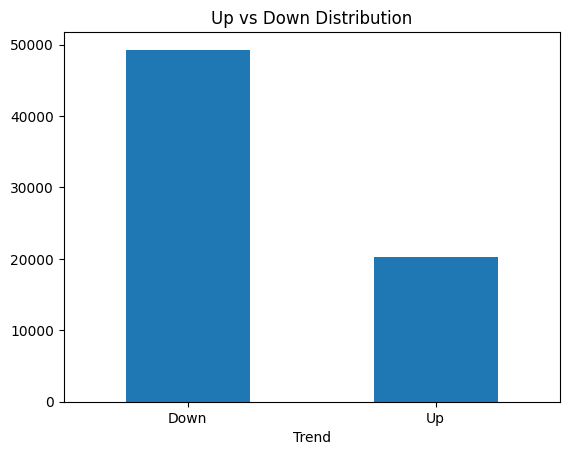

In [133]:
import matplotlib.pyplot as plt

nse_df['Trend'].value_counts().plot(kind='bar')
plt.title("Up vs Down Distribution")
plt.xticks([0,1], ['Down','Up'], rotation=0)
plt.show()


### price distribution

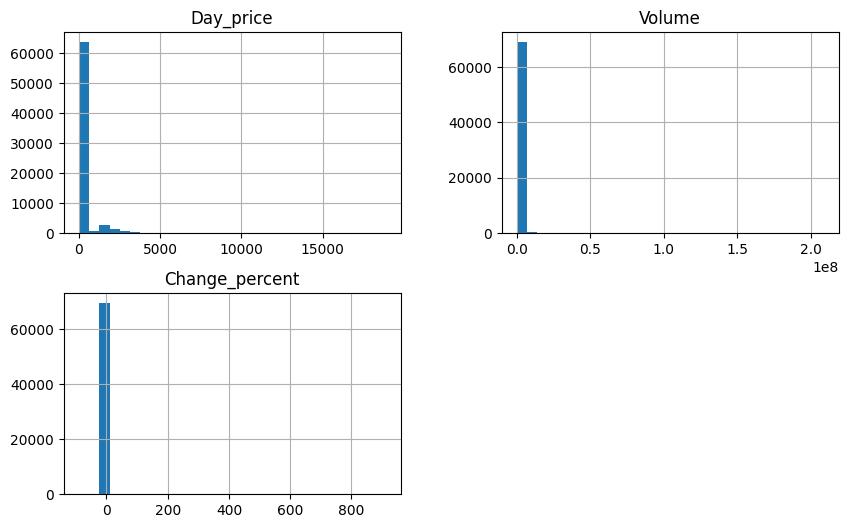

In [141]:
nse_df[['Day_price', 'Volume', 'Change_percent']].hist(bins=30, figsize=(10,6))
plt.show()


### Which sector is more likely to rise?

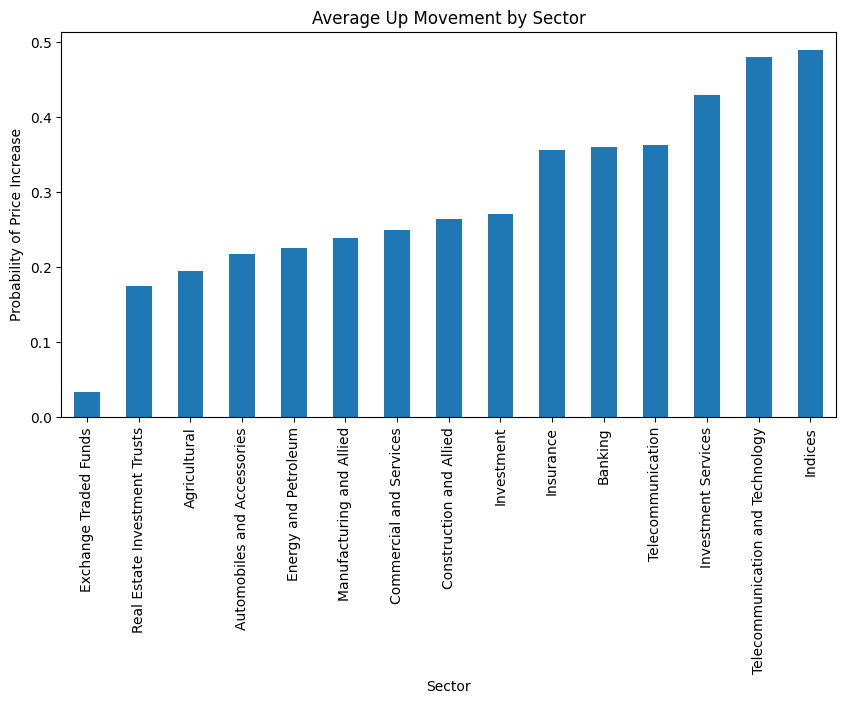

In [140]:
#sector analysis
sector_perf = nse_df.groupby('Sector')['Target'].mean().sort_values()

sector_perf.plot(kind='bar', figsize=(10,5))
plt.title("Average Up Movement by Sector")
plt.ylabel("Probability of Price Increase")
plt.show()


### Monthly pattern

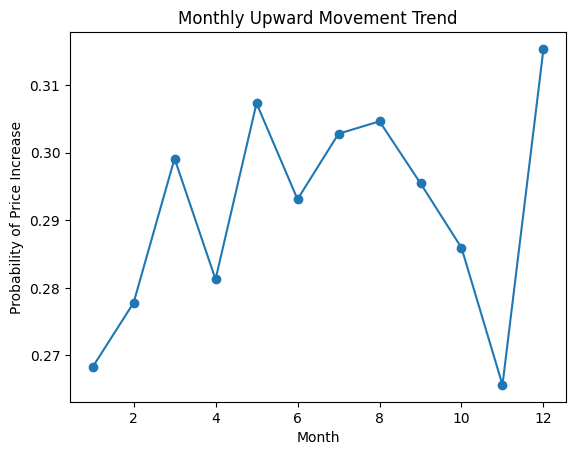

In [142]:
monthly = nse_df.groupby('Month')['Target'].mean()

monthly.plot(kind='line', marker='o')
plt.title("Monthly Upward Movement Trend")
plt.ylabel("Probability of Price Increase")
plt.show()


### PHASES Checklist: (personal checklists to be deleted later ✔️,✅)

#### 1. problem & business understanding
    Problem statement ✅

    Stakeholders ✅

    Objectives & specific objectives ✅

    Success metrics

#### 2. Data Understanding & Collection
    Describe NSE price bulletins ✅

    Explain variables (prices, volume, indices) ✅

    Identify limitations (missing values, non-trading days)

#### 3. Data Cleaning & Preparation
    Combine 2021,2022,2023 & 2024 ✅

    Fix dates ✅

    Convert numeric columns ✅

    Handle missing values ✅

    Remove indices if needed 

    Feature engineering:

     -Daily returns

     -Volatility

     -Moving averages

#### 4. Exploratory Data Analysis (EDA)
    Price trends

    Volume vs price

    Volatility comparison

    Sector/company comparison

    Correlation analysis

📊 Target balance (Up vs Down)

📈 Price distributions

🔄 Correlation analysis

🏢 Sector analysis

📅 Time patterns (Month / Year trends)


#### 5. Modeling
|A|B|C|
|	:---|	:---|	:---|
||||

#### 6. Model Evaluation
    Metrics

    Accuracy

    Precision / Recall

    F1-score

    Confusion Matrix

#### 7. Insights & Recommendations


#### 8.

#### 9.